## 4-8. 凡例のカスタマイズ

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

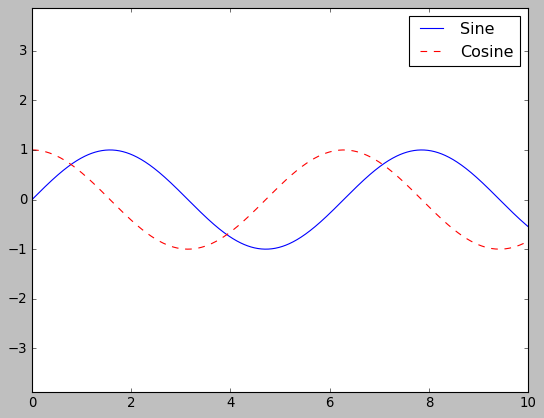

In [9]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine');
ax.plot(x, np.cos(x), '--r', label='Cosine');
ax.axis('equal')
leg = ax.legend();

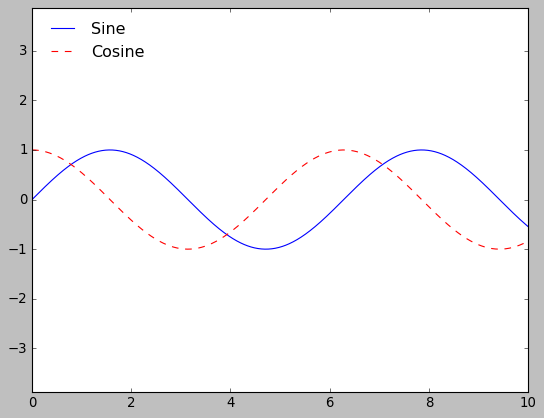

In [15]:
#位置、枠線の指定
ax.legend(loc='upper left', frameon=False)
fig

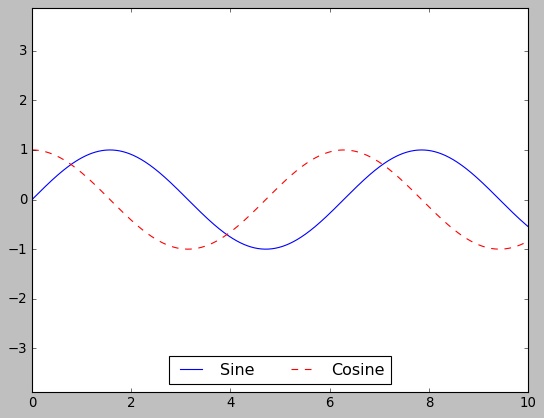

In [19]:
#凡例の列数を指定
ax.legend(loc='lower center', ncol=2)
fig

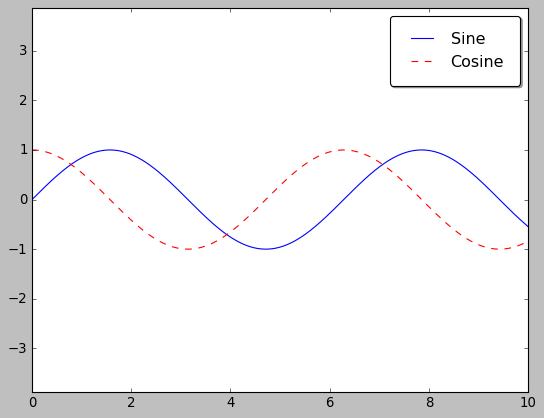

In [21]:
#角丸、影、フレームの透明度を指定
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

## 4.8.1 凡例要素の選択

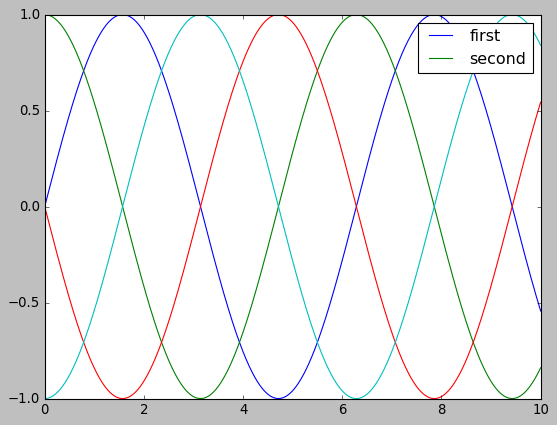

In [23]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

#linesは、plt.line2Dインスタンスのリスト
plt.legend(lines[:2], ['first', 'second']);

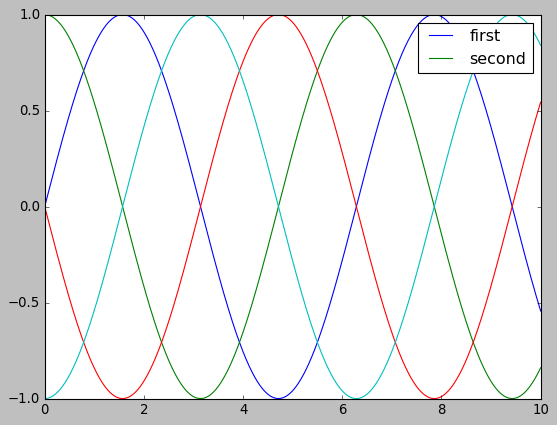

In [27]:
#凡例を表示しておくplot要素に対してラベルを付加
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

## 4.8.2 点サイズの凡例

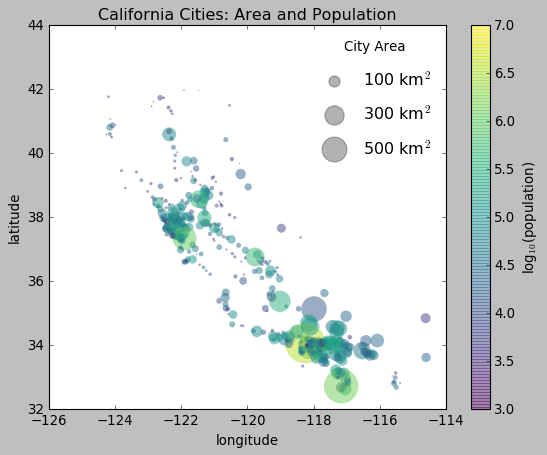

In [34]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')

#着目しているデータを抜き出す
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# 各地点に色と大きさを指定した散布図をプロット
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

#点の大きさとラベルを指定した上でからのリストをプロットする
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

## 4.8.3 複数の凡例

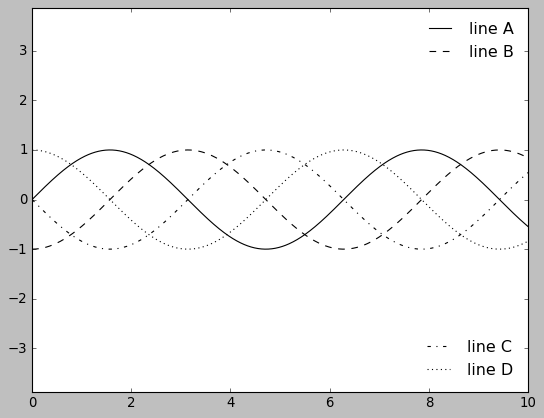

In [35]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# 1つ目の凡例の行とラベルを指定
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# 2つ目の凡例を生成し、そのartistインスタンスを生成する
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);